## Exercise 1. Dendrogram

Use the distance matrix in the following table to perform single link and
Complete link hierarchical clustering. Show your results by drawing a dendrogram. The
dendrogram should clearly show the order in which the points are merged.

<img src="documentation/distance-matrix.png">

## Load the dataset
The **Pandas** library is used to load from *.csv* format, since the distance matrix is stored as a *.csv* file. The **Pandas** library returns a **DataFrame** from the *.csv* file.

The **Pandas** **DataFrame** also has the advantage that it's displayed as an aesthetic HTML table by the Jupyter notebook.

In [6]:
import pandas as pd
distMatrixPath = "./distance-matrix.csv"

# Load the CSV matrix and create a 'data frame' from it
distMatrixDataFrame = pd.read_csv(distMatrixPath, index_col=0)

# Display distance matrix, as a Pandas DataFrame
distMatrixDataFrame

,p1,p2,p3,p4,p5,p6
p1,0.00,0.24,0.22,0.37,0.34,0.23
p2,0.24,0.00,0.15,0.20,0.14,0.25
p3,0.22,0.15,0.00,0.15,0.28,0.11
p4,0.37,0.20,0.15,0.00,0.29,0.22
p5,0.34,0.14,0.28,0.29,0.00,0.39
p6,0.23,0.25,0.11,0.22,0.39,0.00


## Convert data frame matrix to a "condensed matrix"
The **Pandas DataFrame** obtained from the *.csv* file is in original form (a matrix), but the **linkage()** function from the **SciPy** library expects a **condensed matrix**.

A condensed matrix is a matrix which only contains the upper-right triangular half of the matrix:

<img src="documentation/condensed-matrix.png">

The reason for which only the upper triangle is needed is because the distance between two items *p1* and *p2* is **commutative**, meaning that *dist(p1, p2) = dist(p2, p1)*, so the two triangles of the matrix are the same. The diagonal of the matrix is also unnecessary, because it only contains the distance between each item and itself and, by convention, the distance between an item and itself is always zero. So these distances are also omitted.

But obtaining the upper triangle of the matrix is not sufficient, because the **SciPy** **linkange()** expects that its array of distances is supplied as a one-dimensional list, not a two-dimensional one. So the upper triangle is also **flattened**, it's converted to a one-dimensional array.

<img src="documentation/flattened-matrix.png">

In [7]:
import numpy as np

# Convert the symmetric distance matrix DataFrame to a condensed distance matrix
# This is required for the `linkage` function

# Get the values from the data frame
distMatrix = distMatrixDataFrame.values

# This is the 'condensed' version of the original distance matrix: a 'flat' array
condensedDistancesList = []

# Obtain only the values from the upper triangle of the matrix and add
# these values to a one-dimensional array (a 'flat' matrix)
n = len(distMatrix)
for i in range(n):
    for j in range(i + 1, n):
        condensedDistancesList.append(distMatrix[i][j])

condensedDistances = np.array(condensedDistancesList)

# Convert the condensed distances to a Pandas 'DataFrame', in order to display
# the condensed matrix in an aestethic manner. In Jupyter notebooks, Pandas
# 'data frames' are automatically displayed as HTML tables.
# We write the 'condensedDistances' array in [] (brackets) so that it will be treated as row
# instead of a column.
condensedDistancesDataFrame = pd.DataFrame([condensedDistances])
condensedDistancesDataFrame # Display the 'condensed distance matrix', as Pandas DataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.24,0.22,0.37,0.34,0.23,0.15,0.2,0.14,0.25,0.15,0.28,0.11,0.29,0.22,0.39


## Perform hierarchical clustering
We will use both **single linkage** and **complete linkage**, for which we use the predefined **linkage()** function from the SciPy library. The **linkage()** function is responsible for applying the hierarchical clustering.

Two methods are used:
* **single**: uses the **minimum** distance between cluster elements in order to merge clusters
* **complete**: uses the **maximum** distance between cluster elements in order to merge clusters

In [8]:
from scipy.cluster.hierarchy import linkage

# Perform hierarchical clustering using single linkage
singleLinkage = linkage(condensedDistances, method='single')

# Perform hierarchical clustering using complete linkage
completeLinkage = linkage(condensedDistances, method='complete')

# Create Pandas 'DataFrame' for prettier display and display the linkages
singleLinkageDataFrame = pd.DataFrame(singleLinkage)
display(singleLinkageDataFrame)

completeLinkageDataFrame = pd.DataFrame(completeLinkage)
display(completeLinkageDataFrame)

,0,1,2,3
0,2.0,5.0,0.11,2.0
1,1.0,4.0,0.14,2.0
2,6.0,7.0,0.15,4.0
3,3.0,8.0,0.15,5.0
4,0.0,9.0,0.22,6.0


,0,1,2,3
0,2.0,5.0,0.11,2.0
1,1.0,4.0,0.14,2.0
2,3.0,6.0,0.22,3.0
3,0.0,7.0,0.34,3.0
4,8.0,9.0,0.39,6.0


## Plot the dendrograms

['p1', 'p2', 'p3', 'p4', 'p5', 'p6']

Merge Steps for 'single linkage':
Merged p3 with p6; merging distance: 0.11
Merged p2 with p5; merging distance: 0.14
Merged (p3,p6) with (p2,p5); merging distance: 0.15
Merged p4 with ((p3,p6),(p2,p5)); merging distance: 0.15
Merged p1 with (p4,((p3,p6),(p2,p5))); merging distance: 0.22

Merge Steps for 'complete linakge':
Merged p3 with p6; merging distance: 0.11
Merged p2 with p5; merging distance: 0.14
Merged p4 with (p3,p6); merging distance: 0.22
Merged p1 with (p2,p5); merging distance: 0.34
Merged (p4,(p3,p6)) with (p1,(p2,p5)); merging distance: 0.39



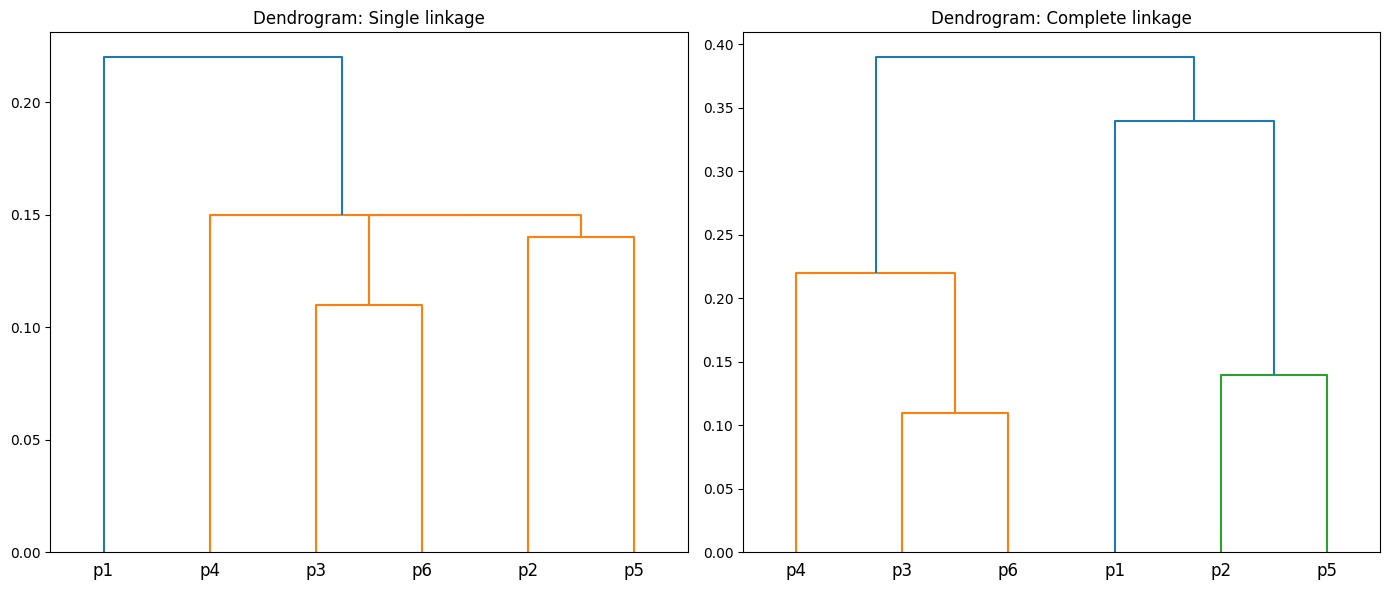

In [9]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

labels = distMatrixDataFrame.index.tolist()

display(labels)

# Function to print merge steps
def showMergeSteps(linkageMatrix):
    currentLabels = labels[:]
    
    for step in linkageMatrix:
        c1 = int(step[0])
        c2 = int(step[1])
        dist = step[2]
        newCluster = f"({currentLabels[c1]},{currentLabels[c2]})"
        print(f"Merged {currentLabels[c1]} with {currentLabels[c2]}; merging distance: {dist:.2f}")
        
        # Append new cluster and update index references
        currentLabels.append(newCluster)

    print("") # Print a new line at the end

# Print the merge steps for 'single linakge'
print("Merge Steps for 'single linkage':")
showMergeSteps(singleLinkage)

# Print the merge steps for 'complete linakge'
print("Merge Steps for 'complete linakge':")
showMergeSteps(completeLinkage)

# Plot the dendrograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].set_title("Dendrogram: Single linkage")
dendrogram(singleLinkage, labels=labels, ax=axes[0])

axes[1].set_title("Dendrogram: Complete linkage")
dendrogram(completeLinkage, labels=labels, ax=axes[1])

plt.tight_layout()
plt.show()